In [63]:
import random
import time
import re
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd


sns.set(rc={'figure.figsize':(11,8)})

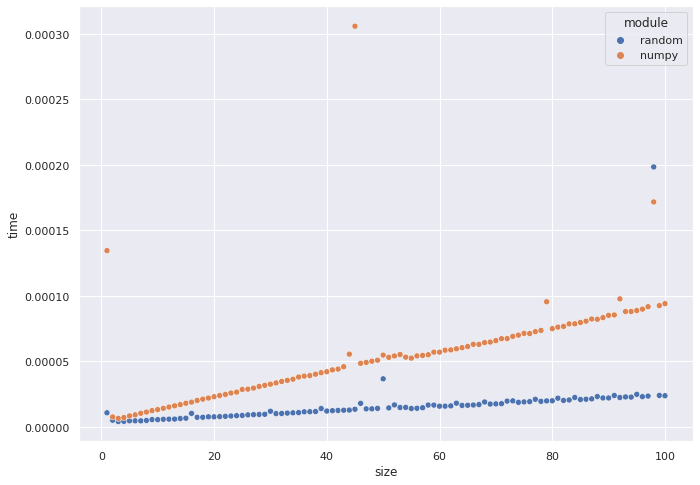

In [114]:
# 1. Measure random & np.random

def random_timing(size) -> None:
    """Measure speed of generating random values from numpt and random modules, plot graph"""
    res = np.zeros((size, 3), dtype="float")
    for i in range(1, size+1):
        t0 = time.process_time()
        [random.random() for _ in range(i)]
        t1 = time.process_time() - t0
        t0 = time.process_time()
        [np.random.sample() for _ in range(i)]
        t2 = time.process_time() - t0
        res[i-1,:] = [i, t1, t2]
    data = pd.DataFrame(data = res[:,:], columns = ["size", "random", "numpy"])
    data2 = pd.melt(data, id_vars=["size"], value_vars=["random", "numpy"])
    data2.columns = ["size", "module", "time"]
    sns.scatterplot(data=data2, x = "size", y = "time", hue = "module")

random_timing(100)

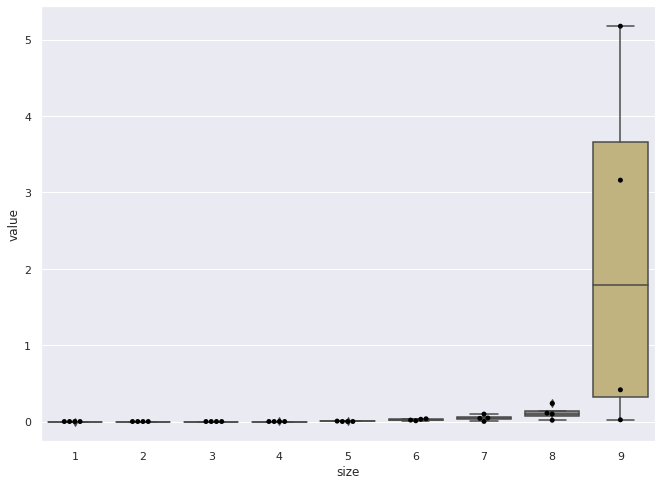

In [142]:
# 2. Bogosort and timing of it

def bogosort_timing(size) -> None:
    """Measure time of monkey sort, plot graph"""
    
    def is_sorted(data) -> bool:
        """TRUE if arg is sorted and FALSE if not"""
        return all(data[i] <= data[i + 1] for i in range(len(data) - 1))

    def bogosort(data) -> list:
        """Shaffle arg, while it will be sorted"""
        while not is_sorted(data):
            random.shuffle(data)
        return data

    res = np.zeros((size, 2, 4), dtype="float")
    for i in range(1, size+1):
        for j in range(4):
            # 4 repeats for measurement
            dumb_list = [random.random() for _ in range(i)]
            t0 = time.process_time()
            bogosort(dumb_list)
            t1 = time.process_time() - t0
            res[i-1,:,j] = [i, t1]
            
    data = pd.DataFrame(data = res[:,1,:])
    data["size"] = [i for i in range(1, size+1)]
    
    data = pd.melt(data, id_vars=["size"], value_vars=[0, 1, 2, 3])
    ax = sns.boxplot(x="size", y="value", data=data)
    ax = sns.swarmplot(x="size", y="value", data=data, color="black")
    plt.show(ax)


bogosort_timing(9)

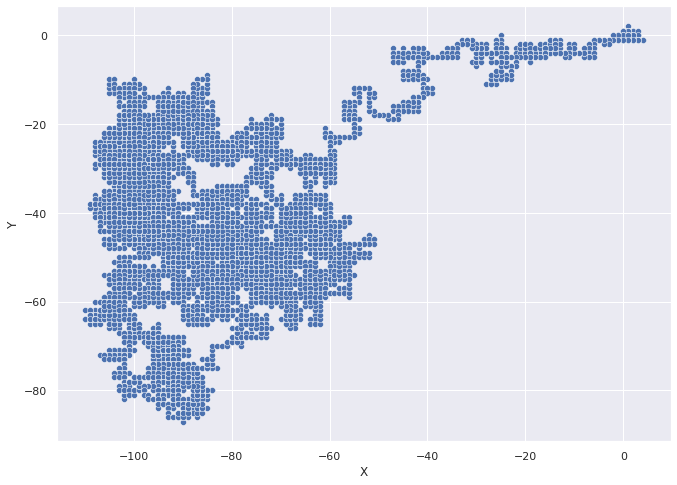

In [113]:
# 3. Random walk in 2D square

def random_walk(steps) -> None:
    """Plot random walking graph"""
    res = np.zeros((steps+1, 2), dtype=int)
    res[0, :] = [0,0]
    
    def new_coords(current_coords) -> list:
        """New coords after random step from point"""
        new_coord = current_coords
        step = random.choice([[0,1], [1,0], [-1, 0], [0, -1]])
        new_coord[0] = current_coords[0] + step[0]
        new_coord[1] = current_coords[1] + step[1]
        return new_coord
                
        

    for i in range(steps):
        res[i+1, :] = new_coords(res[i, :])
    data = pd.DataFrame(data = res[:,:], columns = ["X", "Y"])
    sns.scatterplot(data=data, x = "X", y = "Y")

random_walk(10000)


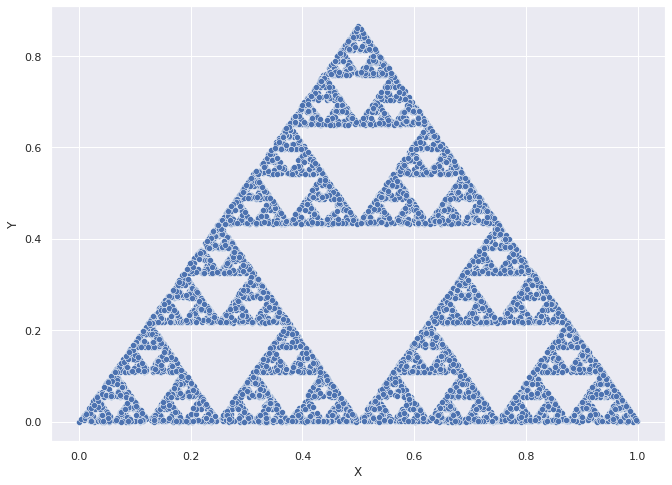

In [139]:
# 4 Serpinski triangle random generation

def serpinski_triangle_generate(iterations) -> None:
    """Plot dots according Sierpinski triangle rule"""
    res = np.zeros((iterations+1, 2), dtype=float)
    
    def get_midpoint(point1, point2):
        """Rule for getting midpoint"""
        return [(point1[0] + point2[0])/2, (point1[1] + point2[1])/2]

    res[0,:] = [0,0]

    a = [0,0]
    b = [1,0]
    c = [0.5,np.sqrt(3)/2]

    for i in range(iterations):
        dice = random.choice(["to_a", "to_b", "to_c"])
        if dice == "to_a":
            curr_point = get_midpoint(res[i,:], a)
        if dice == "to_b":
            curr_point = get_midpoint(res[i,:], b)
        if dice == "to_c":
            curr_point = get_midpoint(res[i,:], c)
        res[i+1,:] = curr_point

    data = pd.DataFrame(data = res[:,:], columns = ["X", "Y"])
    sns.scatterplot(data=data, x = "X", y = "Y")

serpinski_triangle_generate(10000)

In [111]:
# 5. Mixed letters in a phrase

def mix_letters(phrase) -> str:
    """Mix letters in all words, except first and last, one non-letter
    symbol will be excluded from both ends of the word, if exists"""
    res = ''
    data = phrase.split(" ")
    for word in data:
        postfix, prefix = ["", ""]
        if word and not word[-1].isalpha():
            postfix = word[-1]
            word = word[:-1]
        if word and not word[0].isalpha():
            prefix = word[0]
            word = word[1:]
#         print(prefix, word, postfix)
        if len(word) > 3:
            mid = list(word[1:-1])
            random.shuffle(mid)
            new_word = word[0] + "".join(mid) + word[-1]
#             print(prefix + new_word + postfix)
            res += prefix + new_word + postfix + " "
        else:
#             print(prefix + word + postfix)
            res += prefix + word + postfix + " "
    return res[:-1]
            
    
text = "Puppy pregnancy syndrome is a psychosomatic illness in humans brought on by mass hysteria. \
People suffering from this condition believe that shortly after being bitten by a dog, puppies \
are conceived within their abdomen. Victims are said to bark like dogs and have reported being \
able to see the puppies inside them when looking at water or hear them growling in their abdomen. \
It is believed that the victims will eventually die – especially men, who will give birth to \
their puppies through the penis. (Wikipedia)"    

mix_letters(text)

'Pppuy pcnrneagy snyormde is a pysstmoohciac ilnlses in humnas bguhrot on by mass htsrieya. Pelpoe sfueifrng form this ciooindtn beivlee that solrhty atefr bieng bttein by a dog, pueipps are cieocnevd wthiin thier admoben. Vmtciis are siad to brak lkie dogs and have rteoeprd being albe to see the puipeps idinse tehm wehn lkoinog at water or haer tehm grionwlg in teihr aedmbon. It is beleievd that the vctmiis will evullntaey die – eesillacpy men, who wlil gvie brith to tiehr peiupps thguroh the pneis. (Weiiikdpa)'

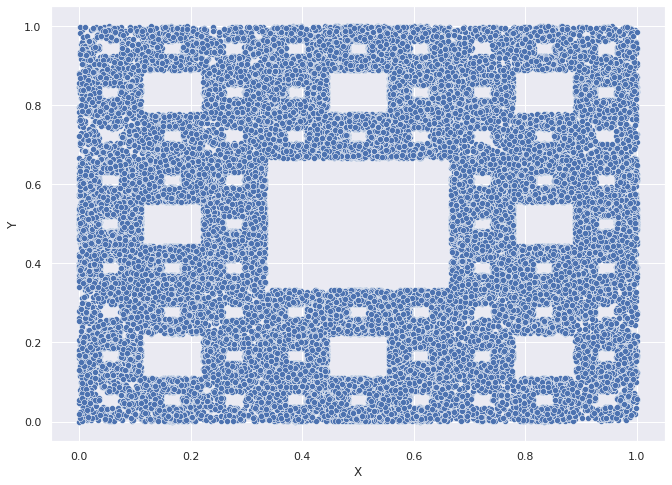

In [205]:
# 6. Serpinski carpet random generation

def serpinski_carpet_generate(iterations) -> None:
    """Plot dots according Sierpinski carpet rule"""
    res = np.zeros((iterations + 1, 2), dtype=float)
    res[0,:] = [0,0]
    
    def find_attractor(point):
        """return closest attractor's coordinates"""
        attractors = [[0,0], [0.5, 0], [1,0], [1, 0.5], [1,1], [0.5, 1], [0,1], [0, 0.5]]
        res = []
        for i, attr_point in enumerate(attractors):
            # return attractor and sum of distances(between attractor and point) by X and Y coords
            res.append([attr_point, abs(attr_point[0] - point[0]) + abs(attr_point[1] - point[1])])
        # find attractor with minimal distances attractor - point
        attractor = [att for att,d in res if d == min(res, key = lambda x: x[1])[1]]
        return attractor[0]
    
    def get_midpoint(point, attractor):
        """Rule for getting midpoint"""
        return [(point[0] + 2 * attractor[0])/3, (point[1] + 2 * attractor[1])/3]
    
    for i in range(iterations):
        dice = [random.random(), random.random()]
        res[i+1,:] = get_midpoint(res[i,:], find_attractor(dice))
    
    data = pd.DataFrame(data = res[:,:], columns = ["X", "Y"])
    sns.scatterplot(data=data, x = "X", y = "Y")
    
    
serpinski_carpet_generate(100000)

In [562]:
# bonus. Markov's chains text generation

def i_am_Tolstoy(corpus) -> str:
    """Return a phrase from Markov's chain generator"""

    # Read corpus, split by sentences, add start- and endpoints
    data = open(corpus, encoding='utf8').read()
    data = re.sub("\xa0", " ", data) # normal spaces
    
    sentences = re.split('\.|\n', data)
    sentences = ["START "+sentense.strip()+". END" for sentense in sentences if sentense]
    
    # Make a dictionary of words'pairs
    d = {}
    for sentence in sentences:
        phrase = sentence.split(" ")
        for i in range(len(phrase) - 1):
            first, second = phrase[i], phrase[i+1]
            if first in d.keys():
                d[first].append(second)
            else:
                d[first] = [second]

                
    result = [random.choice(d["START"])]
    while True:
        word = random.choice(d[result[-1]])
        if word == "END":
            break
        else:
            result.append(word)
    
    return(" ".join(result))


# Use War and Peace as a corpus
i_am_Tolstoy("war_and_peace.utf8.txt")

'Возвращаясь домой, Наташа назначила время, как вообще про дуэль?.'